In [1]:
import numpy as np
import matplotlib.pyplot as plt
from params import Params
from ktnsrm.SpecRepMethod import SRM

In [30]:
from Kamai import Kamai
from utils import *
from wind_load import Wind_load

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
params = Params()

### the Kamai spectrum
- presume sigma_1 is known
- V_hub is known
- L_k is L1

$$
S(f) = \frac{4 \sigma_{1}^2 \frac{L_{k}}{V_{hub}}}{(1 + 6 f \frac{L_{k}}{V_{hub}})^{5/3}}
$$

In [5]:
kamai_spec = Kamai(V_hub = params.V_ref, sigma_1=1, z=params.z_hub)

In [6]:
psd = kamai_spec.get_spectrum()

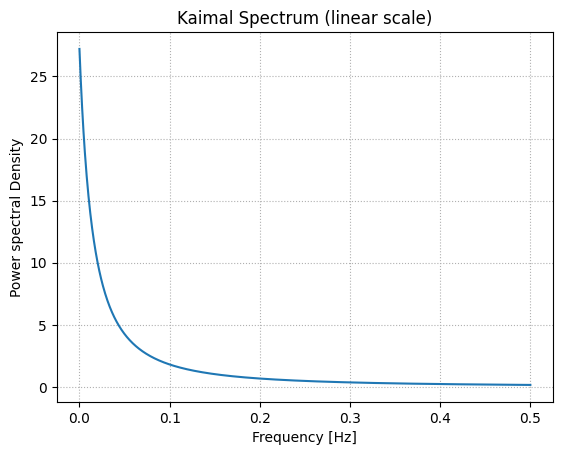

In [7]:
kamai_spec.plot_spectrum(S_f=psd)

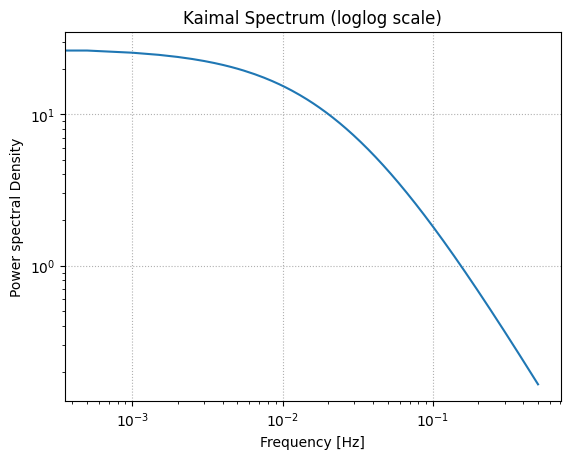

In [11]:
kamai_spec.plot_spectrum(S_f=psd, style='log')
save2Vis('Kaimal_spectrum_loglog')

In [12]:
# instantiate the simulation object
simulation_obj = SRM(wu=2*2*np.pi, N1=1000, fs=1000, duration=200)

In [13]:
simulation_amp = simulation_obj._SpecRepsentation0(psd, plotting=False)

the lower limit of sampling frequency: 4
the length of the simulation (200000,)


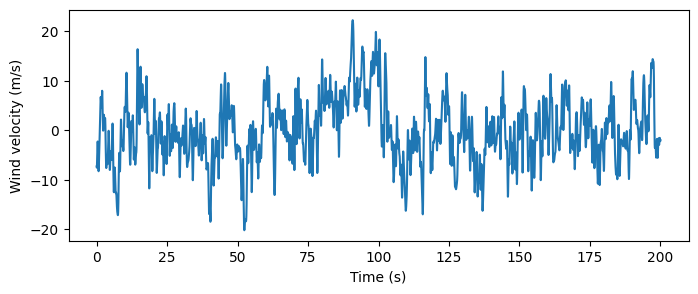

In [14]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(simulation_obj.t_axis_4simu, simulation_amp)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Wind velocity (m/s)')
# ax.set_ylim([-80, 80])
plt.show()

In [15]:
shifted_simulation = kamai_spec.simulation_at_height(simulation_obj, psd, params, height=73.5)

the lower limit of sampling frequency: 4
the length of the simulation (200000,)


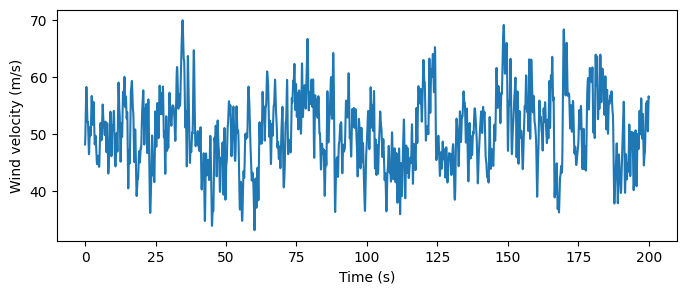

In [17]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(simulation_obj.t_axis_4simu, shifted_simulation)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Wind velocity (m/s)')
# ax.set_ylim([-80, 80])
save2Vis('Kaimal_simulation')

In [26]:
ws_elements = kamai_spec.simulation_heights(simulation_obj, psd, params, params.average_heights)

the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4
the length of the simulation (200000,)
the lower limit of sampling frequency: 4

In [27]:
ws_elements.shape

(15, 200000)

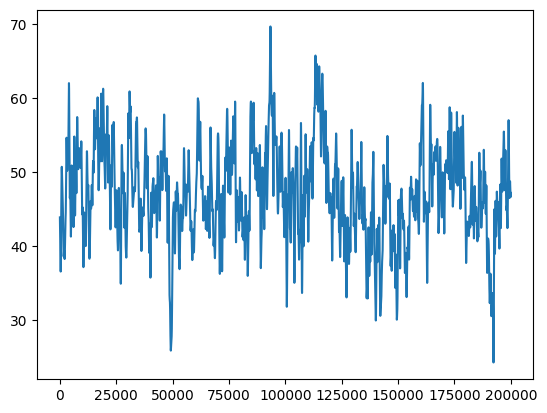

In [28]:
# have a quick inspection
fig, ax = plt.subplots()
ax.plot(ws_at_all_nodes[7])

In [31]:
# compute the force f

wl_EN = Wind_load(time=200, hyperparameters=params, V_hub=params.V_ref, fs=1000) 

In [33]:
ft = wl_EN.cp_dragforce_f(wind_speed_series=ws_elements)

In [34]:
ft.shape

(15, 200000)

In [35]:
# pad zeros to the end .. 60 seconds
ft_0padded = wl_EN.zero_padding(input_series=ft, duration=60)

In [36]:
ft_0padded.shape

(15, 260000)

In [37]:
# save it to Francesca
wl_EN.save_wind_load_series(ts=ft_0padded, name='stochastic_load_elements_0padded', style='Francesca')

In [38]:
# wind speed at hub

ws_hub = kamai_spec.simulation_at_height(simulation_obj, psd, params, height=params.z_hub)

the lower limit of sampling frequency: 4
the length of the simulation (200000,)


In [39]:
# top nodal force
# compute the load for the rotor at the hub

F_hub = wl_EN.cp_wind_loads_F_at_hub(ws_hub=ws_hub)

In [40]:
F_hub.shape

(200000,)

In [41]:
# pad zeros to the end .. 60 seconds
F_hub_0padded = wl_EN.zero_padding(input_series=F_hub, duration=60)

In [42]:
F_hub_0padded.shape

(260000,)

In [43]:
wl_EN.save_wind_load_series(ts=F_hub_0padded, name='stochastic_load_nodal_hub_0padded', style='ignore')